In [27]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
df = pd.read_excel('multiTimeline.xlsx')

In [4]:
df

,Month,Diet,Gym,Finance
0,2004-01-01,100.0,31.0,48.0
1,2004-02-01,75.0,26.0,49.0
2,2004-03-01,67.0,24.0,47.0
3,2004-04-01,70.0,22.0,48.0
4,2004-05-01,72.0,22.0,43.0
...,...,...,...,...
163,2017-08-01,46.0,52.0,43.0
164,2017-09-01,44.0,50.0,47.0
165,2017-10-01,44.0,47.0,45.0
166,2017-11-01,41.0,47.0,47.0


In [6]:
df['Month'] = pd.to_datetime(df['Month']) #converting the month column to datetime 

In [9]:
df.set_index('Month',inplace=True) #setting it as index 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2004-01-01 to 2017-12-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Diet     168 non-null    float64
 1   Gym      168 non-null    float64
 2   Finance  168 non-null    float64
dtypes: float64(3)
memory usage: 5.2 KB


In [12]:
df.head()

,Diet,Gym,Finance
Month,,,
2004-01-01,100.0,31.0,48.0
2004-02-01,75.0,26.0,49.0
2004-03-01,67.0,24.0,47.0
2004-04-01,70.0,22.0,48.0
2004-05-01,72.0,22.0,43.0


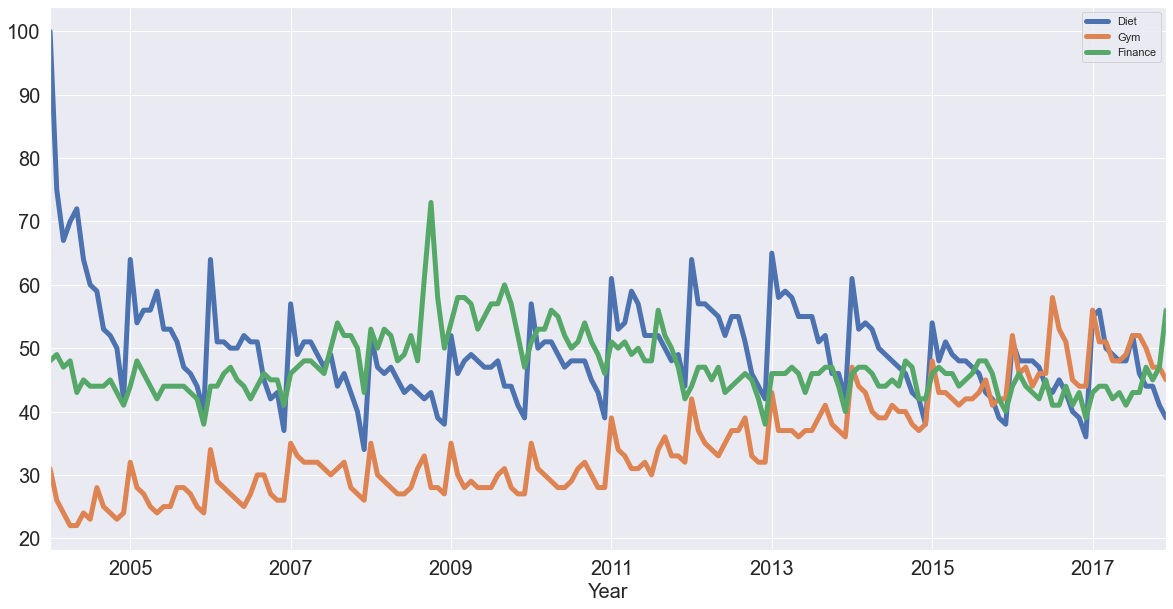

In [28]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20) # plotting the graph for checking the variation over the years.
plt.xlabel('Year', fontsize=20);

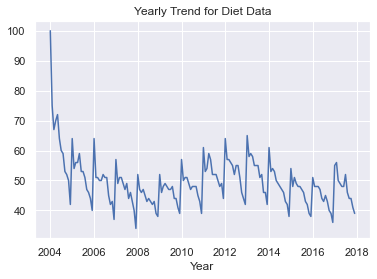

In [36]:
# Plotting only for diet
plt.plot(df.Diet)
plt.title('Yearly Trend for Diet Data')
plt.xlabel('Year')
plt.show()

In [ ]:
# plotting the rolling meanfor Diet and Gym.

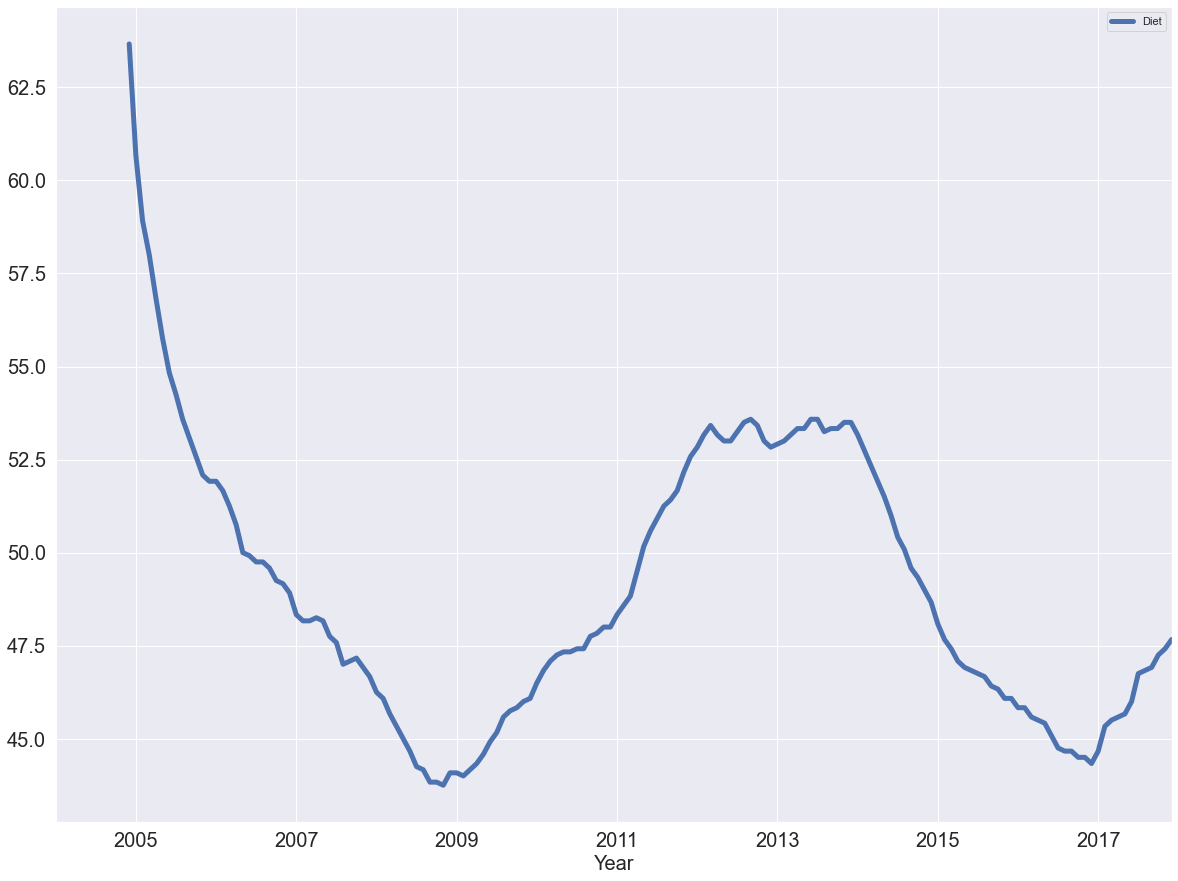

In [37]:
diet = df[['Diet']]
diet.rolling(12).mean().plot(figsize=(20,15), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

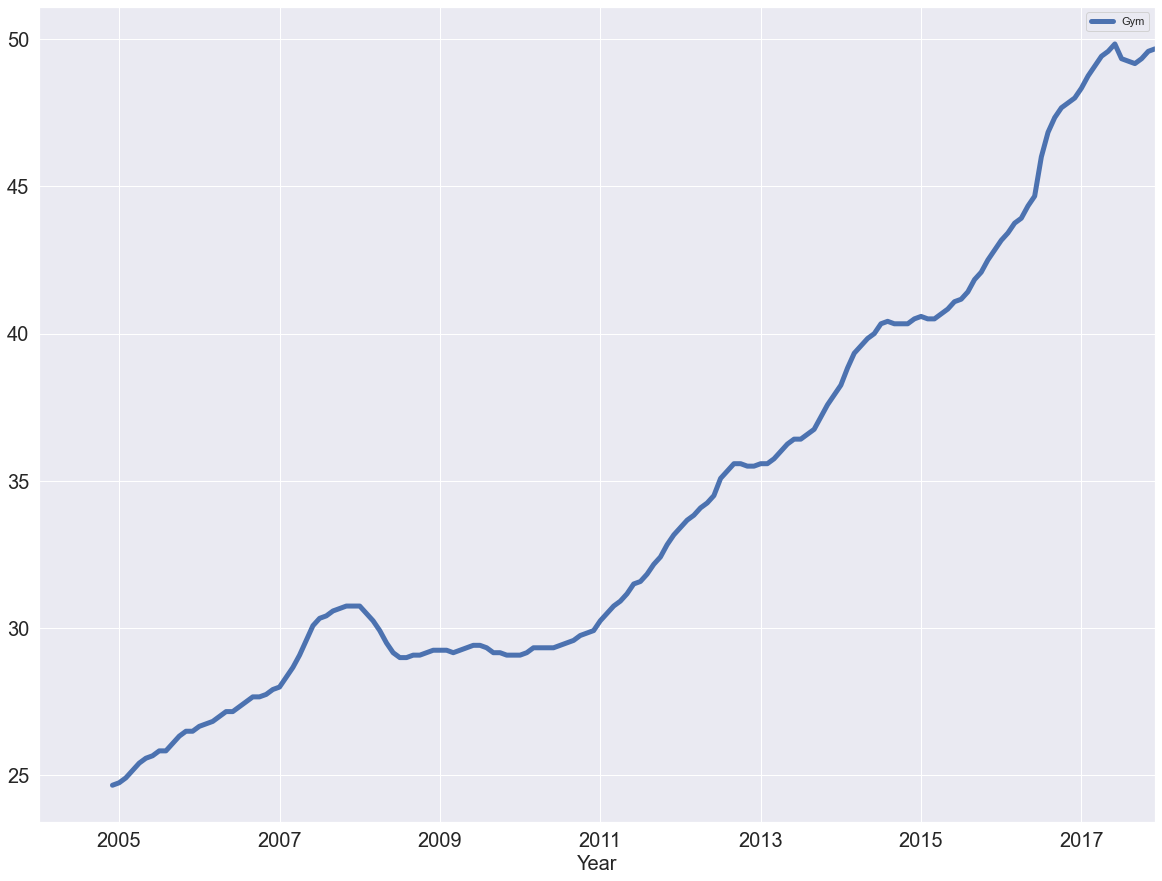

In [38]:
gym = df[['Gym']]
gym.rolling(12).mean().plot(figsize=(20,15), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

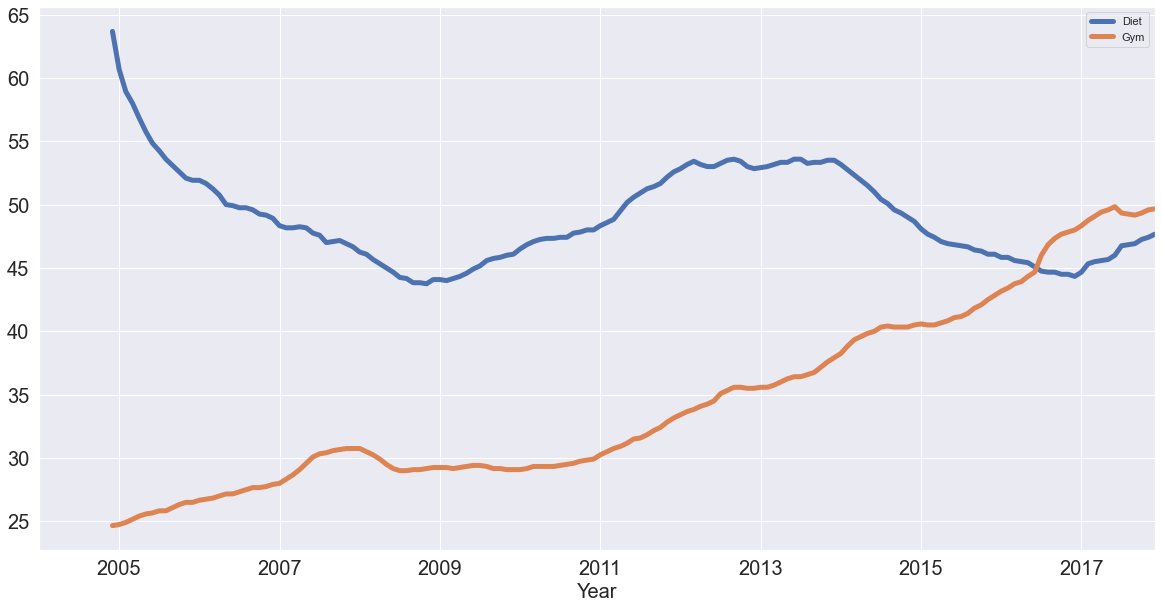

In [39]:
df1 = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df1.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [ ]:
#first order differencing 

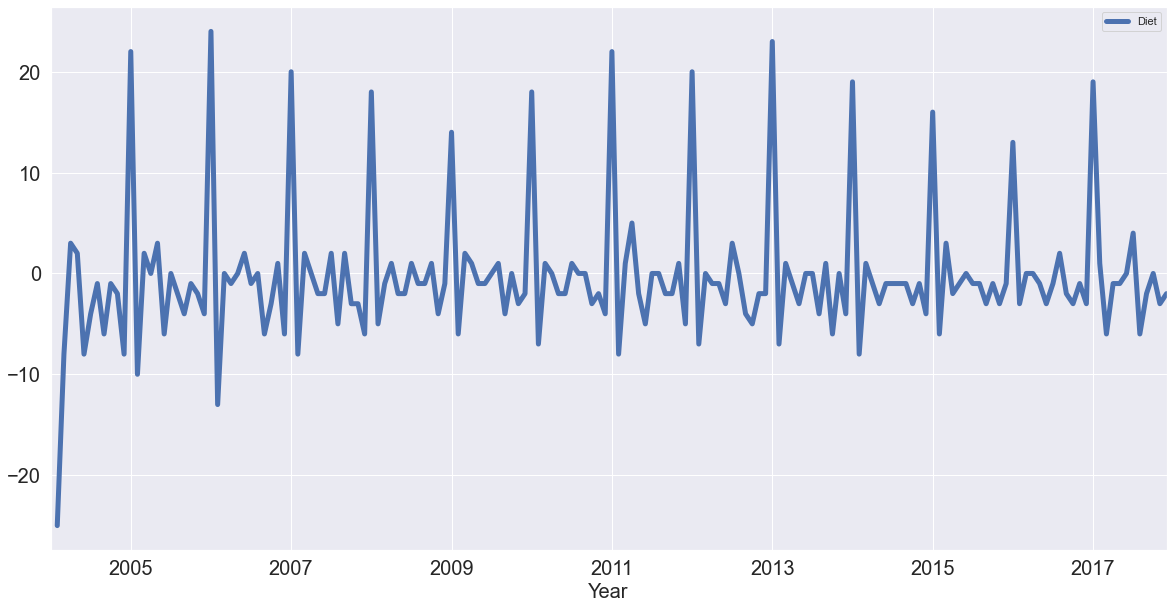

In [30]:
diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

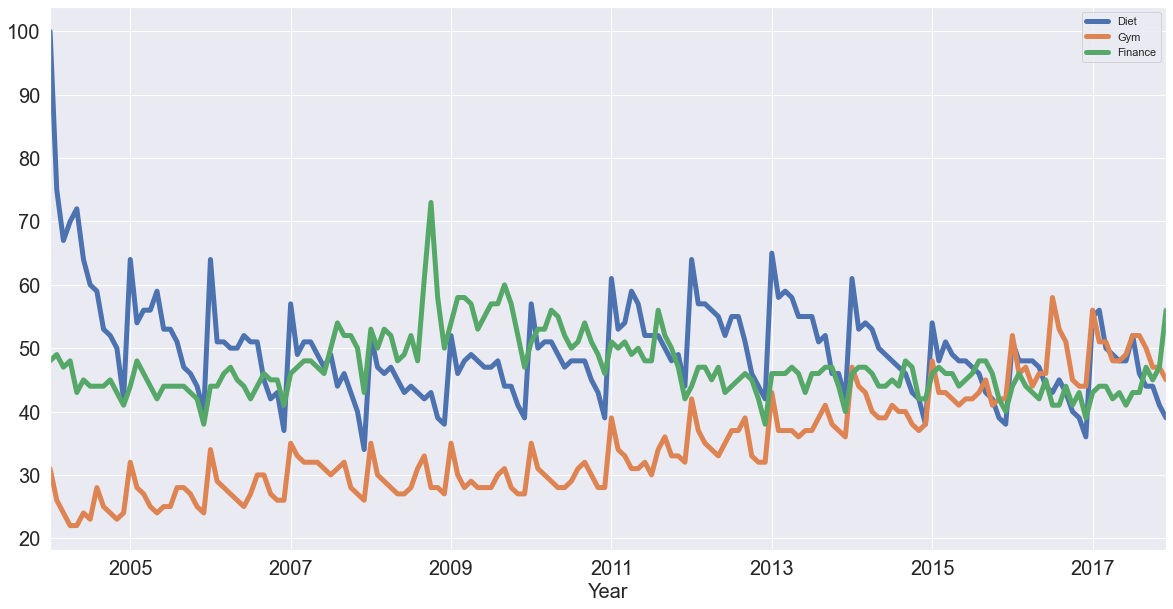

In [31]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [32]:
df.corr()
# it shows Gym and diet are -vely correlated. However thier seasonal componrents are positevely correlated.

,Diet,Gym,Finance
Diet,1.000000,-0.100764,-0.034639
Gym,-0.100764,1.000000,-0.284279
Finance,-0.034639,-0.284279,1.000000


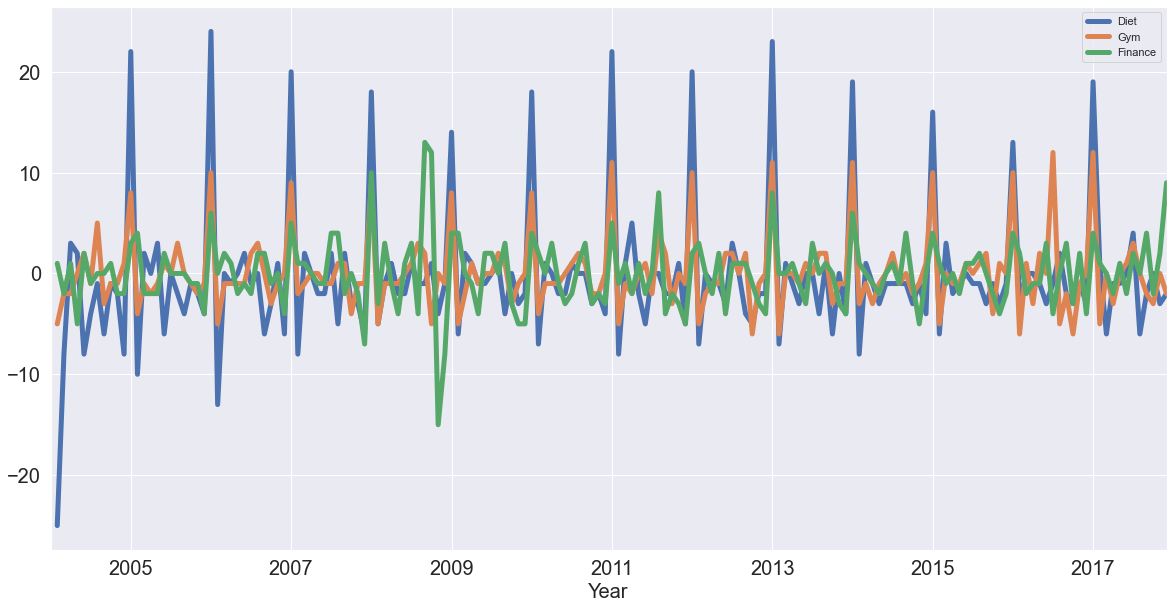

In [33]:
# First order differences 


df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [34]:
df.diff().corr()  # for checking the correlation

,Diet,Gym,Finance
Diet,1.000000,0.758707,0.373828
Gym,0.758707,1.000000,0.301111
Finance,0.373828,0.301111,1.000000


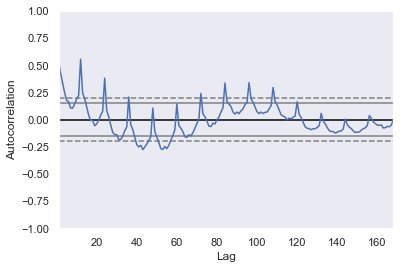

In [35]:
pd.plotting.autocorrelation_plot(diet); #plotting the autocorrelation of the 'diet' series

### What do the dotted lines represent?

The horizontal lines in the plot correspond to 95% and 99% confidence bands.

The dashed line is 99% confidence band. They show the importance of correlation. 

### what is the seasonality ?

Here the seasonality is shown for 12 months.
